# Tips Prediction - Exploratory Data Analysis<a id='Tips_Prediction_-_Exploratory_Data_Analysis' ></a>

## 1. Contents<a id='1._Contents'></a>
* [Tips Prediction - Exploratory Data Analysis](#Tips_Prediction_-_Exploratory_Data_Analysis)
  * [1. Contents](#1._Contents)
  * [2. Sourcing and Loading](#2._Sourcing_and_Loading)
    * [2a. Import relevant libraries](#2a._Import_relevant_libraries)
    * [2b. Load previously wrangled DataFrame](#2b._Load_previously_wrangled_DataFrame)
  * [3. Data Exploration](#3._Data_Exploration)
    * [3a. Correlation heatmap](#3a._Correlation_heatmap)
    * [3b. Pairplots](#3b._Pairplots)
    * [3c. `sex` boxplots](#3c._`sex`_boxplots)
    * [3d. `sex` t-tests](#3d._`sex`_t-tests)
    * [3e. `smoker` boxplots](#3e._`smoker`_boxplots)
    * [3f. `day` boxplots](#3f._`day`_boxplots)
    * [3g. `day` t-tests](#3g._`day`_t-tests)
    * [3h. `time` boxplots](#3h._`time`_boxplots)
    * [3i. `time` t-tests](#3i._`time`_t-tests)
    * [3j. `size` boxplots](#3j._`size`_boxplots)
    * [3k. `size` t-tests](#3k._`size`_t-tests)
  * [4. Conclusion](#4._Conclusion)

## 2. Sourcing and Loading<a id='2._Sourcing_and_Loading' ></a>

### 2a. Import relevant libraries <a id='2a._Import_relevant_libraries' ></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle as kg
import pandas as pd
import missingno as msno
import statsmodels.api as sm
import scipy.stats
from matplotlib.lines import Line2D
from kaggle.api.kaggle_api_extended import KaggleApi
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from zipfile import ZipFile
from scipy import stats
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from numpy.random import seed
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### 2b. Load previously wrangled DataFrame <a id='2b._Load_previously_wrangled_DataFrame'></a>

In [4]:
tips = pd.read_csv('tips.csv', index_col=0)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,perc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [10]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   perc        244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.2+ KB


## 3. Data Exploration <a id='3._Data_Exploration' ></a>

### 3a. Correlation heatmap <a id='3a._Correlation_heatmap'></a>

First, I will generate a correlation heatmap in order to see which features have the strongest correlation with `tip`.

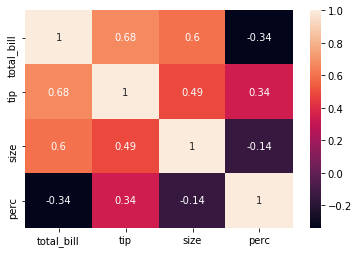

In [9]:
_ = sns.heatmap(tips.corr(), annot=True)

So far, it looks like `tip` shares a moderate correlation with `total_bill`, and a weak correlation with `size` and `perc`.

### 3b. Pairplots <a id='3b._Pairplots'></a>

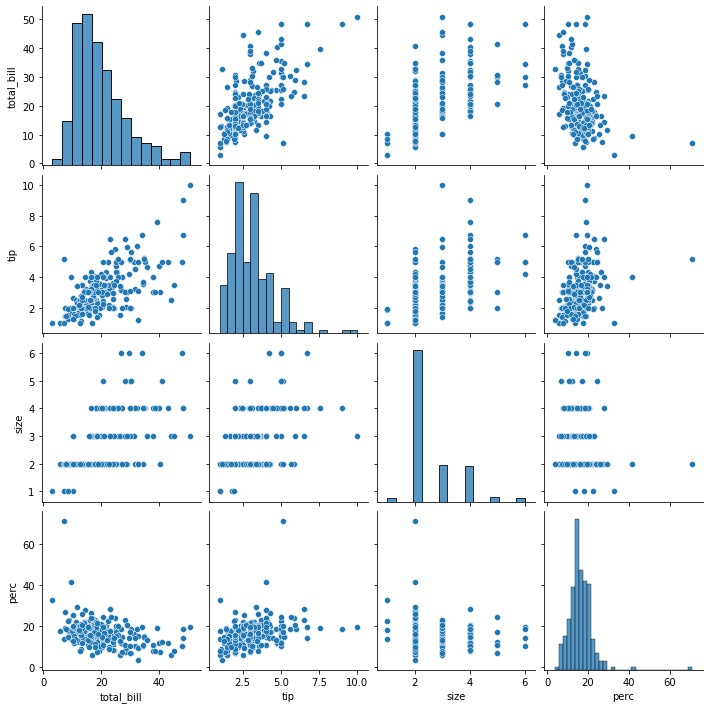

In [8]:
_ = sns.pairplot(tips)

Using the pairplots function in the Seaborn package, we can see a visual representation of the correlation between `tips` and `total_bill`. As `total_bill` increases, `tips` also increases. We can also see that every numerical feature is skewed to the right. 

### 3c. `sex` Boxplots <a id='3c._`sex`_boxplots'></a>

Now that we have a solid grasp of the relationship between `tip` and other numerical features, we can explore the relationship between `tip` and the categorical features in the DataFrame using boxplots. The first feature we can analyze is `sex`.

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0


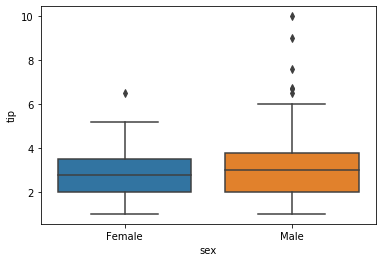

In [14]:
_ = sns.boxplot(data=tips, x='sex', y='tip')
tips.groupby('sex')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,16.649074,5.363173,5.643341,14.041645,15.558149,19.426621,41.666667
Male,157.0,15.765055,6.477787,3.563814,12.138869,15.349194,18.623962,71.034483


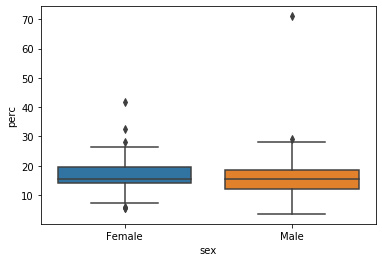

In [15]:
_ = sns.boxplot(data=tips, x='sex', y='perc')
tips.groupby('sex')['perc'].describe()

Although the mean for `tip` is higher for Males, the mean for `perc` is higher for Females. In order to see if this difference is statistically significant, we can conduct a paired t-test using bootstrapped samples.

### 3d. `sex` t-tests <a id='3d._`sex`_t-tests'></a>

In [20]:
female_tip = tips[tips['sex'] == 'Female']['tip']
male_tip = tips[tips['sex'] == 'Male']['tip']
ttest_ind(male_tip, female_tip, equal_var=False)

Ttest_indResult(statistic=1.489536377092501, pvalue=0.13780683808650296)

In [21]:
female_perc = tips[tips['sex'] == 'Female']['perc']
male_perc = tips[tips['sex'] == 'Male']['perc']
ttest_ind(male_perc, female_perc, equal_var=False)

Ttest_indResult(statistic=-1.1432770167349975, pvalue=0.2542456188927581)

With such high p-values, we do not have enough evidence to reject the null hypothesis for either t-test. Therefore, we can conclude that there is no significant difference between the amount or `perc` of `tip` between sexes. 

### 3e. `smoker` boxplots <a id='3e._`smoker`_boxplots'></a>

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0


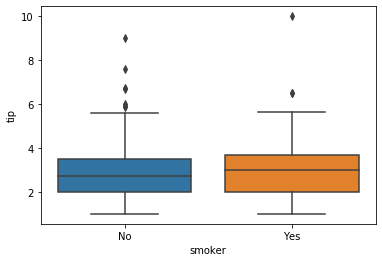

In [22]:
_ = sns.boxplot(data=tips, x='smoker', y='tip')
tips.groupby('smoker')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,15.932846,3.990977,5.679667,13.690561,15.562472,18.501403,29.198966
Yes,93.0,16.319604,8.511920,3.563814,10.677083,15.384615,19.505852,71.034483


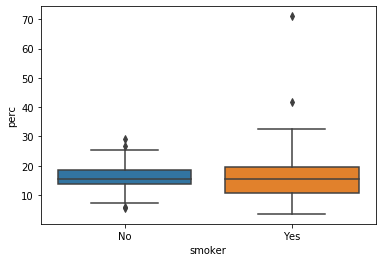

In [23]:
_ = sns.boxplot(data=tips, x='smoker', y='perc')
tips.groupby('smoker')['perc'].describe()

Since the difference in mean `tip` and `perc` between the 2 `smoker` groups seems smaller than the differences in the 2 `sex` groups, there is no need to conduct a t-test on this feature: The difference between these 2 groups is most likely not significant. 

### 3f. `day` boxplots <a id='3f._`day`_boxplots'></a>

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50


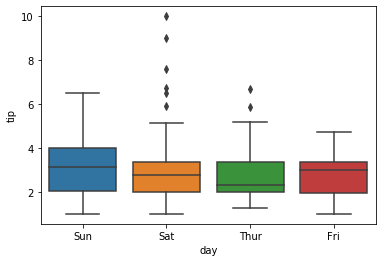

In [41]:
_ = sns.boxplot(data=tips, x='day', y='tip')
tips.groupby('day')['tip'].describe().sort_values(by=['mean'])

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Sat,87.0,15.315172,5.129259,3.563814,12.386329,15.183246,18.827082,32.573290
Thur,62.0,16.127563,3.865182,7.296137,13.820958,15.384615,19.268675,26.631158
Sun,76.0,16.689729,8.473889,5.944673,11.998208,16.110332,18.788908,71.034483
Fri,19.0,16.991303,4.766531,10.355540,13.373871,15.562472,19.663729,26.348039


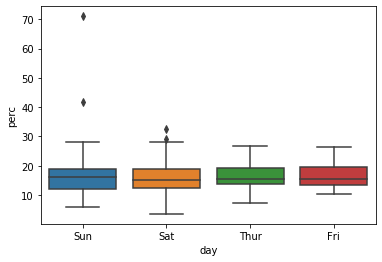

In [42]:
_ = sns.boxplot(data=tips, x='day', y='perc')
tips.groupby('day')['perc'].describe().sort_values(by=['mean'])

### 3g. `day` t-tests <a id='3g._`day`_t-tests'></a>

In order to see if there is a significance in `tip` and `perc` between different `day`s, I will conduct paired t-tests on the days with the lowest and highest `tip` and `perc` values only. 

In [66]:
thur_tip = tips[tips['day'] == 'Thur']['tip']
sun_tip = tips[tips['day'] == 'Sun']['tip']
ttest_ind(thur_tip, sun_tip, equal_var=False)

Ttest_indResult(statistic=-2.283293453871007, pvalue=0.024032440317294304)

In [48]:
sat_perc = tips[tips['day'] == 'Sat']['perc']
fri_perc = tips[tips['day'] == 'Fri']['perc']
ttest_ind(sat_perc, fri_perc, equal_var=False)

Ttest_indResult(statistic=-1.3693838388467752, pvalue=0.18180908342959023)

It looks like we have evidence to reject the null hypothesis that `tip` amounts are the same every day, but not enough evidence to reject the null hypothesis that `perc` amounts are different on different days. As someone who has worked in the service industry, this makes sense. Any seasoned server/bartender knows that weekends are usually more profitable shifts than weekdays.

### 3h. `time` boxplots <a id='3h._`time`_boxplots'></a>

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0


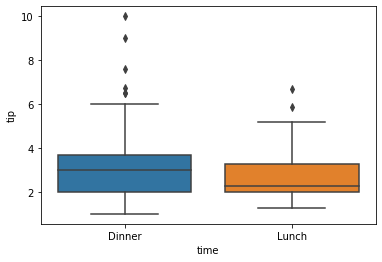

In [49]:
_ = sns.boxplot(data=tips, x='time', y='tip')
tips.groupby('time')['tip'].describe().sort_values(by=['mean'])

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,15.951779,6.747714,3.563814,12.319151,15.540002,18.820878,71.034483
Lunch,68.0,16.412793,4.024155,7.296137,13.914666,15.408357,19.391734,26.631158


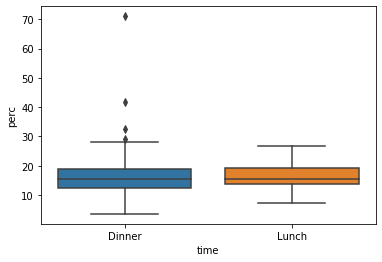

In [51]:
_ = sns.boxplot(data=tips, x='time', y='perc')
tips.groupby('time')['perc'].describe().sort_values(by=['mean'])

### 3i. `time` t-tests <a id='3i._`time`_t-tests'></a>

In [52]:
lunch_tip = tips[tips['time'] == 'Lunch']['tip']
dinner_tip = tips[tips['time'] == 'Dinner']['tip']
ttest_ind(lunch_tip, dinner_tip, equal_var=False)

Ttest_indResult(statistic=-2.0593266215069774, pvalue=0.04126342245429952)

In [53]:
lunch_perc = tips[tips['time'] == 'Lunch']['perc']
dinner_perc = tips[tips['time'] == 'Dinner']['perc']
ttest_ind(lunch_perc, dinner_perc, equal_var=False)

Ttest_indResult(statistic=0.6540376248863964, pvalue=0.5138356163507117)

Once again, another t-test solidifies an age-old belief amongst service workers. This time, we have enough evidence to reject the null hypothesis that **lunch** and **dinner** shifts garner the same amount of `tip`s. However, there is not enough evidence to reject the null hypothesis that `perc` amounts between **lunch** and **dinner** are equal. 

### 3j. `size` boxplots <a id='3j._`size`_boxplots'></a>

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1,4.0,1.437500,0.506516,1.00,1.0000,1.415,1.8525,1.92
2,156.0,2.582308,0.985501,1.00,2.0000,2.500,3.1450,5.85
3,38.0,3.393158,1.557344,1.36,2.3575,3.290,3.6825,10.00
5,5.0,4.028000,1.440111,2.00,3.0000,5.000,5.0000,5.14
4,37.0,4.135405,1.640668,2.00,3.0000,3.760,5.0700,9.00
6,4.0,5.225000,1.053170,4.20,4.8000,5.000,5.4250,6.70


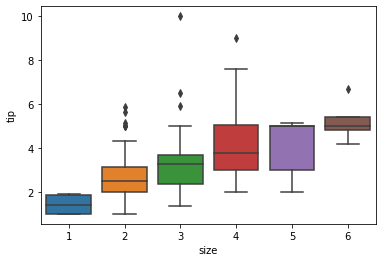

In [58]:
_ = sns.boxplot(data=tips, x='size', y='tip')
tips.groupby('size')['tip'].describe().sort_values(by=['mean'])

The amount of `tip` increases as `size` increases, which makes sense, as a larger group would most likely spend more than a smaller group at a restaurant.

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
5,5.0,14.149549,6.773266,6.565988,10.657194,12.138869,17.219430,24.166264
4,37.0,14.594901,4.239533,7.745933,11.774956,14.669927,16.979656,28.053517
3,38.0,15.215685,4.545887,5.643341,12.475755,15.932311,18.613473,23.074192
6,4.0,15.622920,4.215338,10.379905,13.165446,16.289124,18.746598,19.533528
2,156.0,16.571919,6.684824,3.563814,13.522313,15.610418,19.503614,71.034483
1,4.0,21.729202,8.034186,13.793103,17.077869,20.275206,24.926539,32.573290


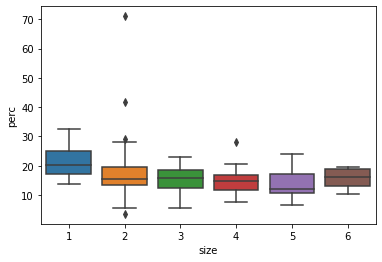

In [59]:
_ = sns.boxplot(data=tips, x='size', y='perc')
tips.groupby('size')['perc'].describe().sort_values(by=['mean'])

### 3k. `size` t-tests <a id='3k._`size`_t-tests'></a>

In [62]:
size1_tip = tips[tips['size'] == 1]['tip']
size6_tip = tips[tips['size'] == 6]['tip']
ttest_ind(size1_tip, size6_tip, equal_var=False)

Ttest_indResult(statistic=-6.481880311579943, pvalue=0.0022330182051115703)

In [65]:
size1_perc = tips[tips['size'] == 1]['perc']
size5_perc = tips[tips['size'] == 5]['perc']
ttest_ind(size1_perc, size5_perc, equal_var=False)

Ttest_indResult(statistic=1.5065450248196361, pvalue=0.18312723491749552)

We can see here that there is a significant difference in `tip` amounts between different size groups, but not in `perc` amounts. 

## 4. Conclusion <a id='4._Conclusion'></a>

When taking a closer look at our features, we start to see the relationships between different variables. Most of these relationships are common sense, but it is reassuring to see such intuitions supported by data. The following are a list of notable relationships that were discovered in our exploratory data analysis.

- **`tip` and `total_bill`** share a moderately strong positive correlation
- There is a significant difference between **`tip` amounts on different `day`s**
- There is a significant difference between **`tip` amounts on different `time`s**

In the next section, I will attempt to fit a predictive model on this dataset.